**Importing required libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_iris 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris_data = load_iris()

In [3]:
df = pd.DataFrame(iris_data.data, columns = iris_data['feature_names'])
df['target'] = iris_data['target']

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Here,in Target column 0: 'setosa', 1:'versicolor', 2:'virginica'** 

In [5]:
X = df.drop('target', axis = 1)
y = df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [7]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [8]:
X_test.shape, y_test.shape

((30, 4), (30,))

**Building ANN**

In [9]:
model = Sequential()

model.add(Flatten(input_shape = (4,)))

model.add(Dense(25, kernel_initializer = 'random_uniform',bias_initializer = 'random_uniform', activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(3, activation='softmax'))        


model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 25)                125       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                416       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


**Here, we take coordinates randomly**

In [10]:
checkpoint = ModelCheckpoint("ANN_Iris.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 300, 
                    verbose = 1, callbacks= [checkpoint])

Epoch 1/300
4/4 [==============================] - 1s 229ms/step - loss: 1.1455 - accuracy: 0.3302 - val_loss: 1.1042 - val_accuracy: 0.3333

Epoch 00001: loss improved from inf to 1.13948, saving model to ANN_Iris.hdf5
Epoch 2/300
4/4 [==============================] - 0s 33ms/step - loss: 1.1076 - accuracy: 0.3229 - val_loss: 1.0887 - val_accuracy: 0.3333

Epoch 00002: loss improved from 1.13948 to 1.10427, saving model to ANN_Iris.hdf5
Epoch 3/300
4/4 [==============================] - 0s 26ms/step - loss: 1.0997 - accuracy: 0.3604 - val_loss: 1.0772 - val_accuracy: 0.7000

Epoch 00003: loss improved from 1.10427 to 1.09424, saving model to ANN_Iris.hdf5
Epoch 4/300
4/4 [==============================] - 0s 28ms/step - loss: 1.0860 - accuracy: 0.6540 - val_loss: 1.0659 - val_accuracy: 0.7000

Epoch 00004: loss improved from 1.09424 to 1.08426, saving model to ANN_Iris.hdf5
Epoch 5/300
4/4 [==============================] - 0s 28ms/step - loss: 1.0709 - accuracy: 0.6679 - val_loss: 1


Epoch 00037: loss improved from 0.54304 to 0.52656, saving model to ANN_Iris.hdf5
Epoch 38/300
4/4 [==============================] - 0s 28ms/step - loss: 0.5151 - accuracy: 0.8954 - val_loss: 0.4867 - val_accuracy: 0.8667

Epoch 00038: loss improved from 0.52656 to 0.51020, saving model to ANN_Iris.hdf5
Epoch 39/300
4/4 [==============================] - 0s 33ms/step - loss: 0.4858 - accuracy: 0.9300 - val_loss: 0.4723 - val_accuracy: 0.8667

Epoch 00039: loss improved from 0.51020 to 0.49549, saving model to ANN_Iris.hdf5
Epoch 40/300
4/4 [==============================] - 0s 18ms/step - loss: 0.4623 - accuracy: 0.9060 - val_loss: 0.4586 - val_accuracy: 0.9000

Epoch 00040: loss improved from 0.49549 to 0.48083, saving model to ANN_Iris.hdf5
Epoch 41/300
4/4 [==============================] - 0s 26ms/step - loss: 0.4646 - accuracy: 0.9102 - val_loss: 0.4462 - val_accuracy: 0.9000

Epoch 00041: loss improved from 0.48083 to 0.46711, saving model to ANN_Iris.hdf5
Epoch 42/300
4/4 [===

4/4 [==============================] - 0s 23ms/step - loss: 0.1857 - accuracy: 0.9881 - val_loss: 0.2000 - val_accuracy: 0.9667

Epoch 00074: loss improved from 0.19999 to 0.19521, saving model to ANN_Iris.hdf5
Epoch 75/300
4/4 [==============================] - 0s 18ms/step - loss: 0.2018 - accuracy: 0.9829 - val_loss: 0.1960 - val_accuracy: 0.9667

Epoch 00075: loss improved from 0.19521 to 0.19105, saving model to ANN_Iris.hdf5
Epoch 76/300
4/4 [==============================] - 0s 23ms/step - loss: 0.1762 - accuracy: 0.9860 - val_loss: 0.1918 - val_accuracy: 0.9667

Epoch 00076: loss improved from 0.19105 to 0.18599, saving model to ANN_Iris.hdf5
Epoch 77/300
4/4 [==============================] - 0s 18ms/step - loss: 0.1866 - accuracy: 0.9806 - val_loss: 0.1880 - val_accuracy: 0.9667

Epoch 00077: loss improved from 0.18599 to 0.18387, saving model to ANN_Iris.hdf5
Epoch 78/300
4/4 [==============================] - 0s 21ms/step - loss: 0.1735 - accuracy: 0.9785 - val_loss: 0.1835

4/4 [==============================] - 0s 23ms/step - loss: 0.1074 - accuracy: 0.9733 - val_loss: 0.1159 - val_accuracy: 0.9667

Epoch 00111: loss improved from 0.10317 to 0.10248, saving model to ANN_Iris.hdf5
Epoch 112/300
4/4 [==============================] - 0s 18ms/step - loss: 0.1097 - accuracy: 0.9733 - val_loss: 0.1107 - val_accuracy: 0.9667

Epoch 00112: loss improved from 0.10248 to 0.10193, saving model to ANN_Iris.hdf5
Epoch 113/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0874 - accuracy: 0.9827 - val_loss: 0.1095 - val_accuracy: 0.9667

Epoch 00113: loss improved from 0.10193 to 0.10109, saving model to ANN_Iris.hdf5
Epoch 114/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0927 - accuracy: 0.9860 - val_loss: 0.1115 - val_accuracy: 0.9667

Epoch 00114: loss improved from 0.10109 to 0.09671, saving model to ANN_Iris.hdf5
Epoch 115/300
4/4 [==============================] - 0s 21ms/step - loss: 0.1184 - accuracy: 0.9596 - val_loss: 0.

4/4 [==============================] - 0s 26ms/step - loss: 0.0695 - accuracy: 0.9913 - val_loss: 0.0860 - val_accuracy: 0.9667

Epoch 00149: loss did not improve from 0.07582
Epoch 150/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0555 - accuracy: 0.9879 - val_loss: 0.0894 - val_accuracy: 0.9667

Epoch 00150: loss improved from 0.07582 to 0.07536, saving model to ANN_Iris.hdf5
Epoch 151/300
4/4 [==============================] - 0s 33ms/step - loss: 0.0850 - accuracy: 0.9650 - val_loss: 0.0885 - val_accuracy: 0.9667

Epoch 00151: loss did not improve from 0.07536
Epoch 152/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0762 - accuracy: 0.9775 - val_loss: 0.0841 - val_accuracy: 0.9667

Epoch 00152: loss improved from 0.07536 to 0.07483, saving model to ANN_Iris.hdf5
Epoch 153/300
4/4 [==============================] - 0s 23ms/step - loss: 0.0848 - accuracy: 0.9798 - val_loss: 0.0833 - val_accuracy: 0.9667

Epoch 00153: loss improved from 0.07483 t

Epoch 190/300
4/4 [==============================] - 0s 23ms/step - loss: 0.0547 - accuracy: 0.9827 - val_loss: 0.0730 - val_accuracy: 0.9667

Epoch 00190: loss did not improve from 0.06582
Epoch 191/300
4/4 [==============================] - 0s 23ms/step - loss: 0.0725 - accuracy: 0.9713 - val_loss: 0.0737 - val_accuracy: 0.9667

Epoch 00191: loss did not improve from 0.06582
Epoch 192/300
4/4 [==============================] - 0s 28ms/step - loss: 0.0730 - accuracy: 0.9713 - val_loss: 0.0737 - val_accuracy: 0.9667

Epoch 00192: loss improved from 0.06582 to 0.06522, saving model to ANN_Iris.hdf5
Epoch 193/300
4/4 [==============================] - 0s 39ms/step - loss: 0.0661 - accuracy: 0.9775 - val_loss: 0.0725 - val_accuracy: 0.9667

Epoch 00193: loss did not improve from 0.06522
Epoch 194/300
4/4 [==============================] - 0s 33ms/step - loss: 0.0685 - accuracy: 0.9765 - val_loss: 0.0740 - val_accuracy: 0.9667

Epoch 00194: loss improved from 0.06522 to 0.06513, saving mod

Epoch 231/300
4/4 [==============================] - 0s 23ms/step - loss: 0.0597 - accuracy: 0.9671 - val_loss: 0.0655 - val_accuracy: 0.9667

Epoch 00231: loss did not improve from 0.06148
Epoch 232/300
4/4 [==============================] - 0s 18ms/step - loss: 0.0602 - accuracy: 0.9733 - val_loss: 0.0695 - val_accuracy: 0.9667

Epoch 00232: loss improved from 0.06148 to 0.06118, saving model to ANN_Iris.hdf5
Epoch 233/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0711 - accuracy: 0.9819 - val_loss: 0.0778 - val_accuracy: 1.0000

Epoch 00233: loss did not improve from 0.06118
Epoch 234/300
4/4 [==============================] - 0s 54ms/step - loss: 0.0570 - accuracy: 0.9796 - val_loss: 0.0676 - val_accuracy: 0.9667

Epoch 00234: loss did not improve from 0.06118
Epoch 235/300
4/4 [==============================] - 0s 29ms/step - loss: 0.0398 - accuracy: 0.9933 - val_loss: 0.0652 - val_accuracy: 0.9667

Epoch 00235: loss did not improve from 0.06118
Epoch 236/300
4

4/4 [==============================] - 0s 39ms/step - loss: 0.0553 - accuracy: 0.9744 - val_loss: 0.0606 - val_accuracy: 0.9667

Epoch 00273: loss did not improve from 0.05851
Epoch 274/300
4/4 [==============================] - 0s 39ms/step - loss: 0.0366 - accuracy: 0.9879 - val_loss: 0.0613 - val_accuracy: 0.9667

Epoch 00274: loss did not improve from 0.05851
Epoch 275/300
4/4 [==============================] - 0s 28ms/step - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0669 - val_accuracy: 1.0000

Epoch 00275: loss did not improve from 0.05851
Epoch 276/300
4/4 [==============================] - 0s 23ms/step - loss: 0.0807 - accuracy: 0.9681 - val_loss: 0.0645 - val_accuracy: 1.0000

Epoch 00276: loss did not improve from 0.05851
Epoch 277/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0424 - accuracy: 0.9879 - val_loss: 0.0608 - val_accuracy: 0.9667

Epoch 00277: loss did not improve from 0.05851
Epoch 278/300
4/4 [==============================] - 0s 23ms/ste

**During training a model there's an update on loss. Does it improving or not?**

In [11]:
weights = model.layers[3].get_weights()[0]
biases = model.layers[3].get_weights()[1]

In [12]:
print("Final weights:" , weights)

Final weights: [[-0.5214639   0.5411113   0.31891423]
 [-0.06894064 -0.9125578  -0.1439376 ]
 [-0.5687945  -0.18376724  0.8216369 ]
 [-0.16452074 -1.1872536   0.9357625 ]
 [ 0.6239564   0.04217616 -1.0811429 ]
 [ 0.23864563 -1.3444498   0.09683673]
 [-0.4244066   0.3364898   0.32311141]
 [-0.9586002   0.49643818  0.3023287 ]
 [ 0.3508541  -0.2836332  -0.4491567 ]
 [-0.4298001   0.46743459  0.00421286]
 [-0.26480654  0.24114853  0.01264071]
 [ 0.54077    -0.5108161  -0.33601552]
 [ 0.3626642   0.05662256 -0.41074777]
 [ 0.6821898  -0.53153247  0.12965797]
 [ 0.3918493  -1.2364935   0.23585878]
 [ 0.5575311   0.7688866  -0.9095657 ]]


In [13]:
print("Final Bias: ",biases)

Final Bias:  [-0.12563649  0.22504923 -0.16277626]


In [14]:
_, train_acc = model.evaluate(X_train, y_train)
_, test_acc = model.evaluate(X_test, y_test)

print("\nTrain_Accuracy : %.3f, Test_Accuracy: %.3f" %(train_acc, test_acc))

1/1 [==============================] - 0s 31ms/step - loss: 0.0582 - accuracy: 0.9667

Train_Accuracy : 0.983, Test_Accuracy: 0.967


In [15]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

**The reason behing to take np.argmax() is that we cannot take a whole array into prediction so we took whichever comes highest amongst them**

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



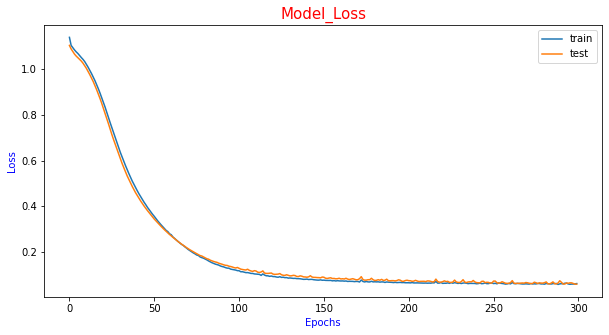

In [17]:
# plot loss during training
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model_Loss',size = 15, color = 'r')
plt.xlabel('Epochs', size = 10, color = 'b')
plt.ylabel('Loss', size = 10, color = 'b')
plt.legend()
plt.show()

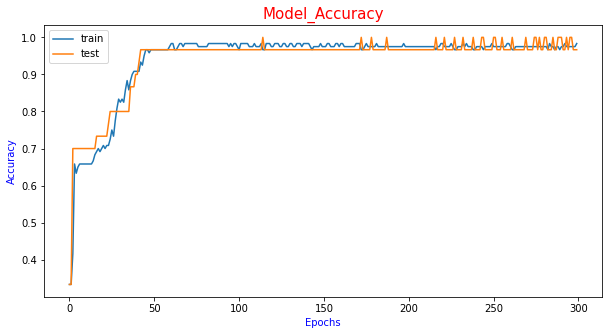

In [18]:
# plot Accuracy during training
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model_Accuracy', size = 15, color= 'r')
plt.xlabel('Epochs', size = 10, color = 'b')
plt.ylabel('Accuracy', size = 10, color = 'b')
plt.legend()

# Thank You